In [138]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics  import root_mean_squared_error
import warnings 
warnings.filterwarnings('ignore')

In [132]:
cc = pd.read_csv('Coal Consumption.csv',index_col=0)
y = cc['Amount']

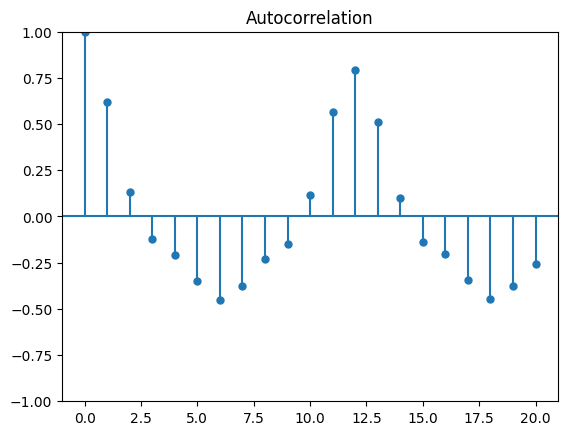

In [133]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   # ACF is Know as Niddle Plot
plot_acf(y, lags= 20, alpha=None)
plt.show()

# ARIMA
- p = Auto Regressiion ( Order off AR Model)
- q  = Integrated ( Order of Difference )
- r = Moving Average ( Order of MA Model )

# Auto Regresive (AR) Model
- Regresion ---> y = b0 + b1X + b2x ...
- Auto Regressive ---> b0 + b1 lag1 + b2 lag2 ...p
- P is a order of Autot Regressive Model
  - No.  of lags consodered in Model (AR Model)
- Model:
  - Today's Value = Constant + Slope * Yesterday's value + Noise
- Softer may use Mean centred versio of this model:
  - (Today's Value - Mean)  = Slope * (Yesterday's value - Mean) + Noise

# Simple Moving Average Model  - MA Model

- today's Value = Mean + Noise + Shape * (Yeasterday's Noise)


In [134]:
mp = pd.read_csv('monthly-milk-production-pounds-p.csv',index_col=0)
mp.index = pd.to_datetime(mp.index).to_period('M').to_timestamp()

In [135]:
from statsmodels.tsa.arima.model import ARIMA

In [136]:
y = mp['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

In [139]:
model = ARIMA(y_train, order=(1,0,0))
model_fit = model.fit()
y_pred = model_fit.predict(start = len(y_train), end = len(y_train)+len(y_test)-1)
print('Root Mean Squared Error Is :',root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error Is : 98.75538388119782


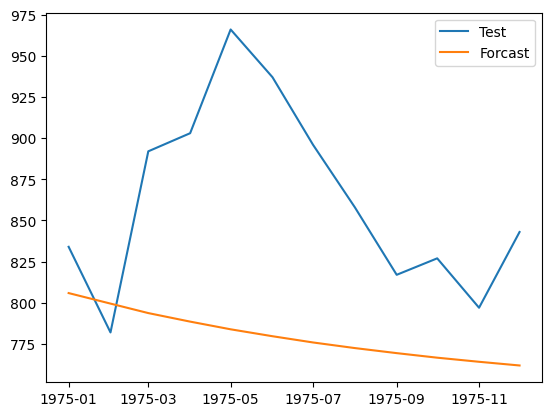

In [140]:
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

In [141]:
# mODEL WITH Onne Order Differcing
y = mp['Milk']
y_train = y[:-12]
y_test = y[-12:]
y_train.shape, y_test.shape

((156,), (12,))

In [142]:
model = ARIMA(y_train, order=(12, 1, 0))
model_fit = model.fit()
y_pred = model_fit.predict(start = len(y_train), end = len(y_train)+len(y_test)-1)
print('Root Mean Squared Error Is :',root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error Is : 13.61629279740246


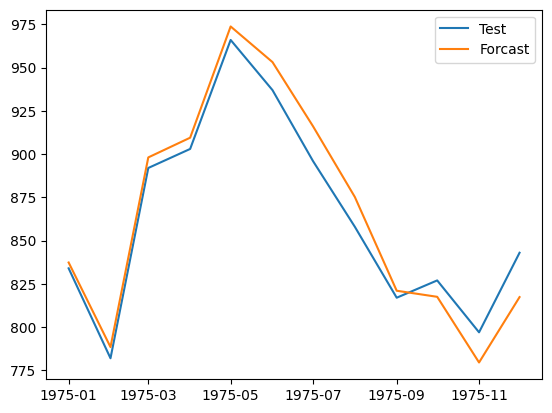

In [143]:
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Forcast')
plt.legend()
plt.show()

# ARMA 
- Auto Regressive Moving Average
- ARIMA is used for a Stationary time series

# ARIMA 
- If the time series is not stationary, then we can dis=fference byb making it stationary and then apply ARMA
- ARIMA model is an integration of both these things, differencing and ARIMA

# SARIMA
- Seasonal Auto Regression Intregrated Moving Average
- Seasonal ARIMA considers not only the past values of the same season period but also the past values of earlier season period
- Parameter :
  - p = Auto Regressiion  ( Order off AR Model)
  - q = Integrated        ( Order of Difference )
  - r = Moving Average    ( Order of MA Model )
  - P = Auto Regressiion  ( Order off Seasonal AR Model)
  - Q = Integrated        ( Order off Seasonal Difference )
  - R = Moving Average    ( Order off Seasonal MA Model )
  - m = Seasonal Time Period
      - 7  = Day
      - 5  = Business Day
      - 12 = Monthly
      - 4  = Quartely
      - 1  = Yearly

In [144]:
model = ARIMA(y_train, order=(3, 1, 0), seasonal_order= (1, 1, 1, 12))
model_fit = model.fit()
y_pred = model_fit.predict(start = len(y_train), end = len(y_train)+len(y_test)-1)
print('Root Mean Squared Error Is :',root_mean_squared_error(y_test, y_pred))

Root Mean Squared Error Is : 10.448496990218121


# Tuning SARIM

In [145]:
!pip install pmdarima

In [146]:
from pmdarima.arima import auto_arima

In [147]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1593.690, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1624.299, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1626.095, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1626.164, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1622.458, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1604.395, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1618.644, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1572.233, Time=0.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=1561.976, Time=1.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 s

- In the outPut `AIC` Stands fro Akaike's Informatiion Criterion
- nd it is equal to root mean square error
- low is better

In [148]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

57.06880071073694

# SARIMA (AUTO)

In [149]:
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, 
                   seasonal=True, m = 12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1000.136, Time=1.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1218.095, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1015.855, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1104.312, Time=0.43 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1349.320, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=998.169, Time=1.42 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1038.230, Time=0.43 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1000.125, Time=3.53 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1012.395, Time=1.21 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=5.63 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=996.457, Time=0.82 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1036.989, Time=0.24 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=998.423, Time=1.06 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=998.411, Time=2.45 sec
 ARIMA(1,0,2)(1,1,0)[12] int

In [150]:
y_pred = model.predict(n_periods= len(y_test))
root_mean_squared_error(y_test,y_pred)

13.941093095028885